# **5th Practical** : Sentiment Analysis of Paragraph




In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

# download necessary nltk packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# take input file path from the user
input_file = input("Enter the path of the input file: ")

# read the input file
with open(input_file, 'r') as f:
    paragraph = f.read()

# perform NLP techniques to preprocess the paragraph
stop_words = set(stopwords.words('english'))
words = word_tokenize(paragraph.lower()) # lowercase the words
words_filtered = [word for word in words if word.isalpha() and word not in stop_words] # remove punctuations and stopwords

# perform sentiment analysis
analyzer = SentimentIntensityAnalyzer()
sentiment = analyzer.polarity_scores(" ".join(words_filtered))['compound']

if sentiment > 0:
    print("The given paragraph has a positive sentiment.")
elif sentiment == 0:
    print("The given paragraph has a neutral sentiment.")
else:
    print("The given paragraph has a negative sentiment.")


# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.sentiment import SentimentIntensityAnalyzer

# # download necessary nltk packages
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('vader_lexicon')

# # take input from the user
# paragraph = input("Enter a paragraph: ")

# # perform NLP techniques to preprocess the paragraph
# stop_words = set(stopwords.words('english'))
# words = word_tokenize(paragraph.lower()) # lowercase the words
# words_filtered = [word for word in words if word.isalpha() and word not in stop_words] # remove punctuations and stopwords

# # perform sentiment analysis
# analyzer = SentimentIntensityAnalyzer()
# sentiment = analyzer.polarity_scores(" ".join(words_filtered))['compound']

# if sentiment > 0:
#     print("The given paragraph has a positive sentiment.")
# elif sentiment == 0:
#     print("The given paragraph has a neutral sentiment.")
# else:
#     print("The given paragraph has a negative sentiment.")


# **1st, 2nd & 3rd Practical** : Data Visualization




In [ ]:
!pip install snscrape pandas numpy nltk spacy textblob matplotlib seaborn sklearn
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
import re
import string
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('reuters.csv')

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

In [ ]:
# Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define preprocessing function
def preprocess_text(text):
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|\#\w+', '', text)
    # Remove links
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize words
    tokens = word_tokenize(text)
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove stop words and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    # Join the tokens back into a string
    text = ' '.join(tokens)
    return text

# Apply the preprocessing function to the text column
df['text'] = df['text'].apply(preprocess_text)

### ***End of 1st***

In [ ]:
# Define function to get sentiment polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to the text column and create a new column for sentiment polarity
df['polarity'] = df['text'].apply(get_polarity)

# Define function to get sentiment label
def get_sentiment_label(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the polarity column and create a new column for sentiment label
df['sentiment'] = df['polarity'].apply(get_sentiment_label)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Define the training and testing datasets
train_data = pd.DataFrame({'text': X_train, 'sentiment': y_train})
test_data = pd.DataFrame({'text': X_test, 'sentiment': y_test})

# Train the model
train_predictions = []
for tweet in train_data['text']:
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        train_predictions.append('positive')
    elif analysis.sentiment.polarity == 0:
        train_predictions.append('neutral')
    else:
        train_predictions.append('negative')

# Test the model
test_predictions = []
for tweet in test_data['text']:
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        test_predictions.append('positive')
    elif analysis.sentiment.polarity == 0:
        test_predictions.append('neutral')
    else:
        test_predictions.append('negative')

# Calculate performance metrics
accuracy = accuracy_score(test_data['sentiment'], test_predictions)
precision = precision_score(test_data['sentiment'], test_predictions, average='weighted')
recall = recall_score(test_data['sentiment'], test_predictions, average='weighted')
f1 = f1_score(test_data['sentiment'], test_predictions, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(test_data['sentiment'], test_predictions)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create a classification report
report = classification_report(test_data['sentiment'], test_predictions)
print(report)

### ***End of 2nd***

In [ ]:
# Load the preprocessed CSV file
df_new = pd.read_csv('test_sent.csv')

# Create a new column called "text" which contains the preprocessed and cleaned text
df_new['text'] = df_new['text'].apply(preprocess_text)

# Apply the sentiment analysis model to the "text" column to generate predictions
predictions = []
for tweet in df_new['text']:
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        predictions.append('positive')
    elif analysis.sentiment.polarity == 0:
        predictions.append('neutral')
    else:
        predictions.append('negative')

# Create a new column called "sentiment" which contains the predicted sentiment labels
df_new['sentiment'] = predictions

# Output the resulting dataframe
print(df_new.head())

df_new.to_csv('results.csv', index=False)


### ***End of 3rd***

# **4th Practical** : Data Visualization




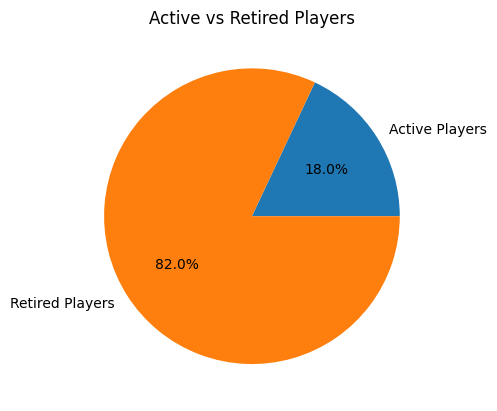

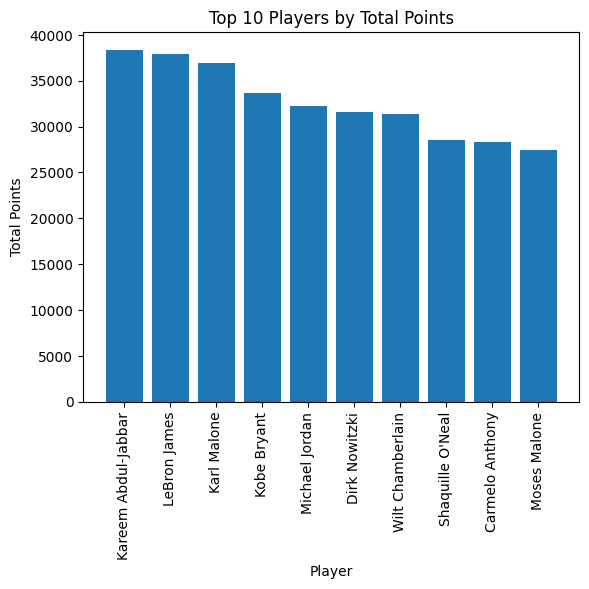

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the NBA dataset
nba_df = pd.read_csv('nba.csv')

# Visualization 1: Pie chart of active players vs retired players
active_players = nba_df['active_player'].sum()
retired_players = len(nba_df) - active_players
labels = ['Active Players', 'Retired Players']
sizes = [active_players, retired_players]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Active vs Retired Players')
plt.show()

# Visualization 2: Bar chart of top 10 players by total points
top_10 = nba_df.sort_values('total_points', ascending=False).head(10)
plt.bar(top_10['player'], top_10['total_points'])
plt.title('Top 10 Players by Total Points')
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('Total Points')
plt.show()
